In [102]:
import pandas as pan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plotter
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import load_model
from sklearn.model_selection import train_test_split, GridSearchCV
import datetime
from sklearn.ensemble import RandomForestRegressor

In [53]:
matrix_data = pan.read_csv("kc_house_data.csv")

In [54]:
#clean data
matrix_data.isna().sum().sum()

0

In [55]:
#drop the unique id, as it's not neccesary for our task
matrix_data.drop("id", axis = 1, inplace = True)

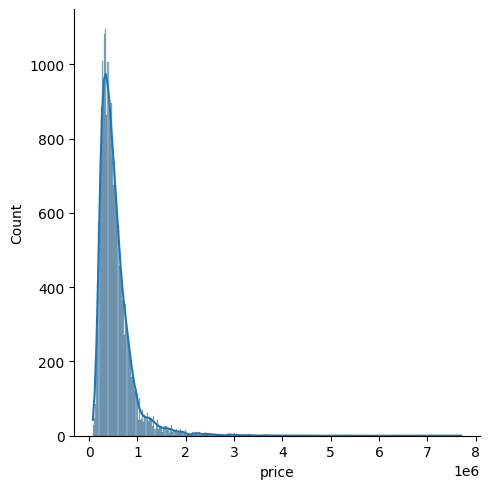

In [56]:
sns.displot(matrix_data["price"], kde = True, fill = True)

<Axes: >

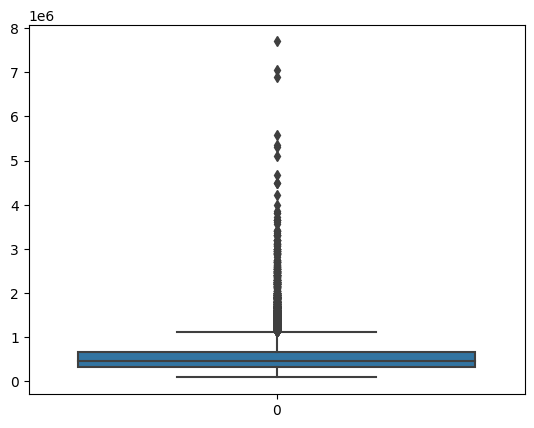

In [57]:
sns.boxplot(matrix_data["price"])

In [58]:
matrix_data.corr(numeric_only = True)["price"].abs().sort_values().drop(index = "price")

long             0.022036
condition        0.036056
zipcode          0.053402
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
Name: price, dtype: float64

<Axes: xlabel='sqft_living', ylabel='price'>

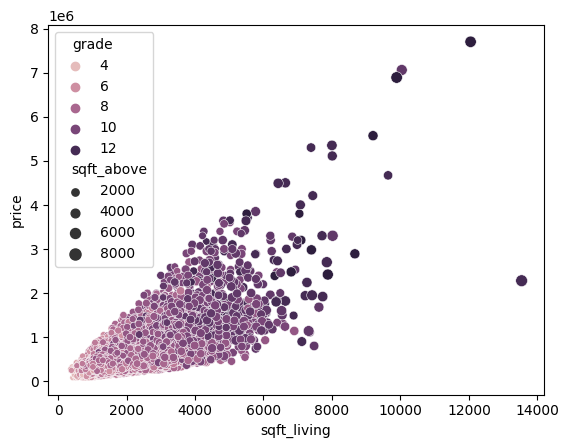

In [59]:
sns.scatterplot(x = matrix_data["sqft_living"], y = matrix_data["price"], hue = matrix_data["grade"], size = matrix_data["sqft_above"])

<Axes: xlabel='long', ylabel='lat'>

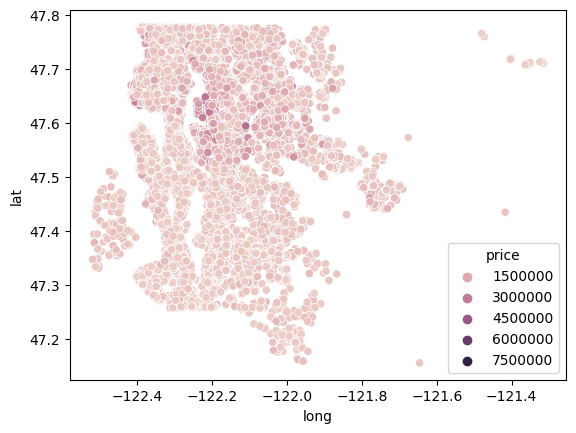

In [60]:
sns.scatterplot(x = matrix_data["long"], y = matrix_data["lat"], hue = matrix_data["price"])

In [61]:
#dropping them outliers biatch!!!!!
matrix_data.drop(index = matrix_data[matrix_data["price"] > matrix_data["price"].quantile(0.99)].index, inplace = True)

<Axes: >

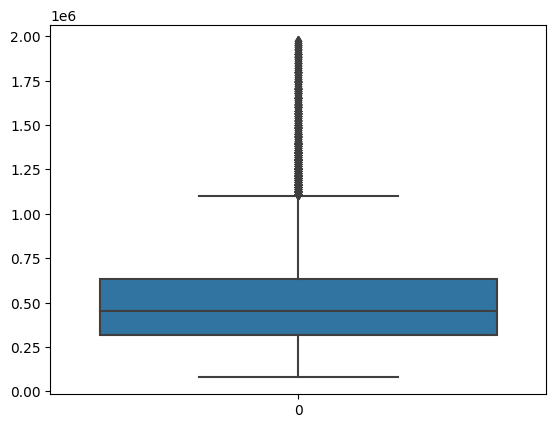

In [62]:
sns.boxplot(matrix_data["price"])

<Axes: xlabel='long', ylabel='lat'>

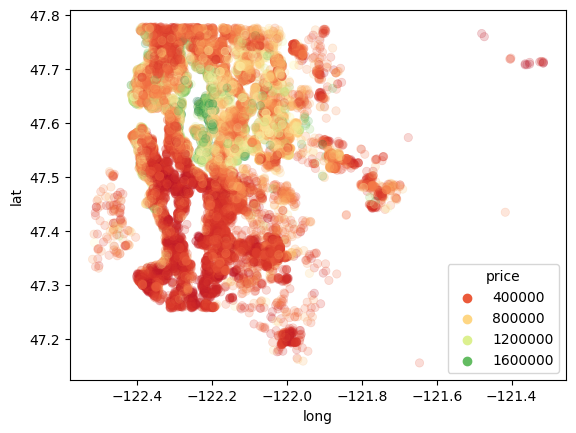

In [65]:
sns.scatterplot(x = matrix_data["long"], y = matrix_data["lat"], hue = matrix_data["price"], edgecolor = None, alpha = 0.2, palette = "RdYlGn")

In [67]:
matrix_data["date"] = pan.to_datetime(matrix_data["date"], infer_datetime_format = True)

C:\Users\omoke\AppData\Local\Temp\ipykernel_8064\3571471475.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  matrix_data["date"] = pan.to_datetime(matrix_data["date"], infer_datetime_format = True)


In [72]:
matrix_data["year"] = matrix_data["date"].apply(lambda x: x.year)

In [75]:
matrix_data["month"] = matrix_data["date"].apply(lambda x: x.month)

In [78]:
matrix_data.groupby("month").mean().transpose().loc["price"]

month
1     504981.466942
2     494462.442649
3     523761.809164
4     541452.515165
5     523547.980269
6     533429.116009
7      526694.00639
8     511327.311946
9     507255.324601
10    519494.580247
11     499781.27977
12    503406.086598
Name: price, dtype: object

In [79]:
matrix_data.groupby("year").mean().transpose().loc["price"]

year
2014    517383.039713
2015    520852.558806
Name: price, dtype: object

In [80]:
matrix_data.drop("date", axis = 1, inplace = True)

In [84]:
#too many zipcodes, probably best to drop
len(matrix_data["zipcode"].unique())
matrix_data.drop("zipcode", axis = 1, inplace = True)

In [87]:
matrix_data["yr_renovated"].value_counts()

yr_renovated
0       20501
2014       91
2013       36
2007       34
2003       34
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [88]:
label = matrix_data["price"].values
features = matrix_data.drop("price", axis = 1).values

In [89]:
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size = 0.3, random_state = 42)

In [91]:
scaler = StandardScaler()
s_feature_train = scaler.fit_transform(feature_train)
s_feature_test = scaler.transform(feature_test)

In [93]:
deep_learner = Sequential()
deep_learner.add(Dense(19, activation = "relu"))
deep_learner.add(Dense(19, activation = "relu"))
deep_learner.add(Dense(19, activation = "relu"))
deep_learner.add(Dense(19, activation = "relu"))
deep_learner.add(Dense(1))
deep_learner.compile(optimizer = "adam", loss = "mse")#rmsprop will do better, I think

In [94]:
deep_learner.fit(x = s_feature_train, y = label_train, validation_data = (s_feature_test, label_test), batch_size = 128, epochs = 450)

Epoch 1/450
117/117 [==============================] - 3s 4ms/step - loss: 352070860800.0000 - val_loss: 345844744192.0000
Epoch 2/450
117/117 [==============================] - 0s 2ms/step - loss: 350953537536.0000 - val_loss: 341714370560.0000
Epoch 3/450
117/117 [==============================] - 0s 2ms/step - loss: 331492491264.0000 - val_loss: 297972039680.0000
Epoch 4/450
117/117 [==============================] - 0s 2ms/step - loss: 242796609536.0000 - val_loss: 173497843712.0000
Epoch 5/450
117/117 [==============================] - 0s 2ms/step - loss: 130165440512.0000 - val_loss: 106200768512.0000
Epoch 6/450
117/117 [==============================] - 0s 2ms/step - loss: 95182536704.0000 - val_loss: 85114544128.0000
Epoch 7/450
117/117 [==============================] - 0s 2ms/step - loss: 75347296256.0000 - val_loss: 65671213056.0000
Epoch 8/450
117/117 [==============================] - 0s 2ms/step - loss: 57556033536.0000 - val_loss: 49639821312.0000
Epoch 9/450
117/117 [=

In [97]:
losses = pan.DataFrame(deep_learner.history.history)
losses

,loss,val_loss
0,3.520709e+11,3.458447e+11
1,3.509535e+11,3.417144e+11
2,3.314925e+11,2.979720e+11
3,2.427966e+11,1.734978e+11
4,1.301654e+11,1.062008e+11
...,...,...
445,1.848914e+10,1.850652e+10
446,1.848793e+10,1.850876e+10
447,1.849981e+10,1.851495e+10
448,1.848766e+10,1.852386e+10


In [100]:
preds = deep_learner.predict(s_feature_test)
mse = mean_absolute_error(label_test, preds)
mse

201/201 [==============================] - 0s 985us/step


91499.10336735191

In [103]:
#lets compare the performance with that of a RandomForest Regressor
rf_subgridder = RandomForestRegressor(bootstrap = True)
param_grid = {"n_estimators": [30, 60, 100, 150, 200], "max_features" : ["sqrt", "log2"]}
gridder = GridSearchCV(rf_subgridder, param_grid, cv = 7, scoring = "neg_mean_absolute_error", n_jobs = 7)
gridder.fit(feature_train, label_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(), n_jobs=7,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [30, 60, 100, 150, 200]},
             scoring='neg_mean_absolute_error')

In [104]:
forest_preds = gridder.predict(feature_test)
forest_mse = mean_absolute_error(label_test, forest_preds)
forest_mse

67003.90015519182

In [105]:
gridder.best_estimator_

RandomForestRegressor(max_features='log2', n_estimators=150)

In [106]:
deep_learner_evs = explained_variance_score(label_test, preds)
forest_learner_evs = explained_variance_score(label_test, forest_preds)

In [107]:
print(deep_learner_evs)
print(forest_learner_evs)

0.7645519650879735
0.8574430187683284


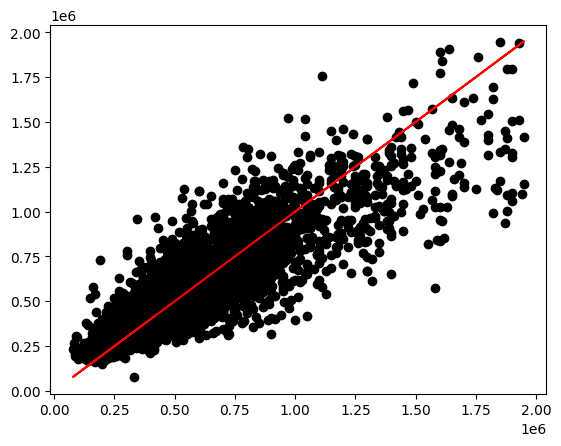

In [113]:
plotter.scatter(x = label_test, y = preds, c = "black")
plotter.plot(label_test, label_test, c = "red")

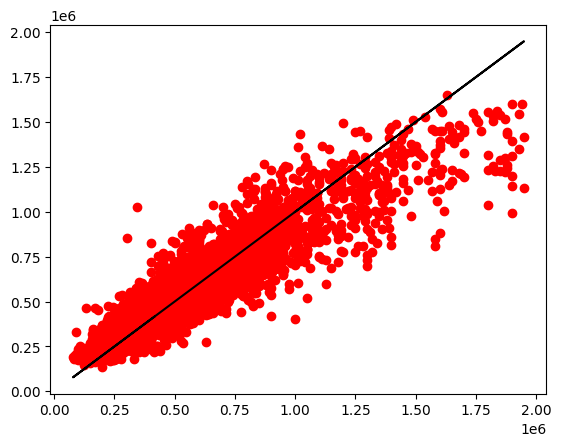

In [112]:
plotter.scatter(x = label_test, y = forest_preds, c = "red")
plotter.plot(label_test, label_test, c = "black")

In [114]:
deep_learner.save("primus_deep_learner.f5")

INFO:tensorflow:Assets written to: primus_deep_learner.f5\assets


INFO:tensorflow:Assets written to: primus_deep_learner.f5\assets
